In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

2024-07-08 16:32:17.204793: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-08 16:32:17.229588: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-08 16:32:17.243642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 16:32:17.272946: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 16:32:17.272994: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-08 16:32:17.289156: I tensorflow/core/platform/cpu_feature_guard.cc:

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data.shape

(42000, 785)

In [6]:
print(train_data.isnull().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


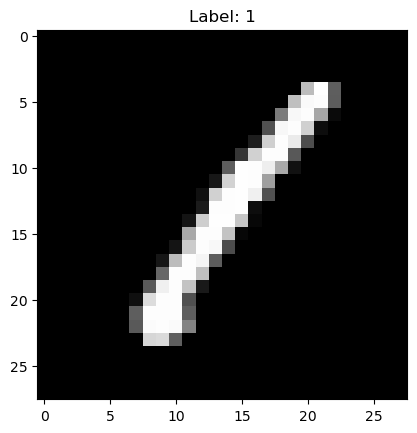

In [7]:
digit = train_data.iloc[0, 1:].values.reshape(28, 28)
plt.imshow(digit, cmap='gray')
plt.title(f"Label: {train_data.iloc[0, 0]}")
plt.show()

In [8]:
X = train_data.iloc[:, 1:].values  
y = train_data.iloc[:, 0].values  

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
y = to_categorical(y)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = Sequential([
    Dense(128, input_shape=(784,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

model.save('backend/model/digit_recognizer_model.h5')


Epoch 1/10


/home/shubham/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-08 16:49:15.543250: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 105369600 exceeds 10% of free system memory.


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8561 - loss: 0.4863 - val_accuracy: 0.9464 - val_loss: 0.1783
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9664 - loss: 0.1090 - val_accuracy: 0.9595 - val_loss: 0.1553
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9789 - loss: 0.0658 - val_accuracy: 0.9617 - val_loss: 0.1447
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9859 - loss: 0.0432 - val_accuracy: 0.9645 - val_loss: 0.1351
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9884 - loss: 0.0350 - val_accuracy: 0.9593 - val_loss: 0.1616
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9896 - loss: 0.0317 - val_accuracy: 0.9629 - val_loss: 0.1723
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9925 - loss: 0.0235 - val_accuracy: 0.9625 - val_loss: 0.1875
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9928 - loss: 0.0225 - val_accurac

In [38]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy:.4f}')

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9631 - loss: 0.2071
Validation Accuracy: 0.9631


In [13]:
test_data.shape

(28000, 784)

In [14]:
X_test = test_data.values

X_test = scaler.transform(X_test)

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

134/875 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step

2024-07-08 16:32:43.836365: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 87808000 exceeds 10% of free system memory.


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step


In [15]:
# submission = pd.DataFrame({'ImageId': range(1, len(y_pred_classes) + 1), 'Label': y_pred_classes})
# submission.to_csv('submission.csv', index=False)

In [34]:
model.save('digit_recognizer_model.h5')